In [90]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import time
import pickle

In [9]:
# Setting pandas to display columns
pd.set_option('display.max_columns', None)

In [10]:
# Setting pandas to display rows
pd.set_option('display.max_rows', None)

In [11]:
# Pulling in NFL Play-by-Play Data
nfl_data_df = pd.read_csv('NFL Play by Play 2009-2018 (v5).csv')

In [12]:
# Looking at size of dataframe
nfl_data_df.shape

(449371, 255)

In [13]:
# Checking out data types
nfl_data_df.dtypes

play_id                                   int64
game_id                                   int64
home_team                                object
away_team                                object
posteam                                  object
posteam_type                             object
defteam                                  object
side_of_field                            object
yardline_100                            float64
game_date                                object
quarter_seconds_remaining               float64
half_seconds_remaining                  float64
game_seconds_remaining                  float64
game_half                                object
quarter_end                               int64
drive                                     int64
sp                                        int64
qtr                                       int64
down                                    float64
goal_to_go                              float64
time                                    

In [14]:
nfl_data_df.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,assist_tackl

In [15]:
# Getting a list of columns in the dataset to allow me to trim down to most important
list(nfl_data_df.columns)

['play_id',
 'game_id',
 'home_team',
 'away_team',
 'posteam',
 'posteam_type',
 'defteam',
 'side_of_field',
 'yardline_100',
 'game_date',
 'quarter_seconds_remaining',
 'half_seconds_remaining',
 'game_seconds_remaining',
 'game_half',
 'quarter_end',
 'drive',
 'sp',
 'qtr',
 'down',
 'goal_to_go',
 'time',
 'yrdln',
 'ydstogo',
 'ydsnet',
 'desc',
 'play_type',
 'yards_gained',
 'shotgun',
 'no_huddle',
 'qb_dropback',
 'qb_kneel',
 'qb_spike',
 'qb_scramble',
 'pass_length',
 'pass_location',
 'air_yards',
 'yards_after_catch',
 'run_location',
 'run_gap',
 'field_goal_result',
 'kick_distance',
 'extra_point_result',
 'two_point_conv_result',
 'home_timeouts_remaining',
 'away_timeouts_remaining',
 'timeout',
 'timeout_team',
 'td_team',
 'posteam_timeouts_remaining',
 'defteam_timeouts_remaining',
 'total_home_score',
 'total_away_score',
 'posteam_score',
 'defteam_score',
 'score_differential',
 'posteam_score_post',
 'defteam_score_post',
 'score_differential_post',
 'no_sc

In [16]:
# Getting smaller set of columns to use for analysis
cols = ['play_id','game_id','game_date','time','quarter_seconds_remaining','half_seconds_remaining',
 'game_seconds_remaining','game_half','quarter_end','qtr','home_team','away_team','posteam','posteam_type',
 'defteam','side_of_field','yardline_100','drive','sp','down','goal_to_go','yrdln','ydstogo','ydsnet',
 'desc','play_type','yards_gained','pass_length','air_yards','yards_after_catch','field_goal_result',
 'kick_distance','extra_point_result','two_point_conv_result','td_team','total_home_score','total_away_score',
 'posteam_score','defteam_score','sack','touchdown','pass_touchdown','rush_touchdown','return_touchdown',
 'extra_point_attempt','two_point_attempt','field_goal_attempt','fumble','complete_pass']

In [17]:
# Creating dataframe with most important columns and only 2017 and 2018
nfl_small = nfl_data_df[nfl_data_df['game_date']>='2017-04-01'][cols].reset_index() #Keeping original index column unless needed later
# nfl_small.head(3)

In [18]:
# Saving nfl_small to csv to skip loading full file
nfl_small.to_csv('nfl_small.csv')

In [19]:
nfl_small = pd.read_csv('nfl_small.csv')
nfl_small.shape

(87277, 51)

In [20]:
# Dropping unused index column and sorting to allow for future calculations
nfl_small = nfl_small.drop(columns=['Unnamed: 0']).sort_values(by=['game_id','play_id'])

In [21]:
nfl_small.head(5)

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass
0,362094,44,2017090700,2017-09-07,15:00,900.0,1800.0,3600.0,Half1,0,1,NE,KC,NE,home,KC,KC,35.0,1,0,NaN,0.0,KC 35,0,73,C.Santos kicks 64 yards from KC 35 to NE 1. D....,kickoff,0.0,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,362095,68,2017090700,2017-09-07,14:55,895.0,1795.0,3595.0,Half1,0,1,NE,KC,NE,home,KC,NE,73.0,1,0,1.0,0.0,NE 27,10,0,(14:55) NE 12-Brady 18th season as Patriots QB...,pass,0.0,deep,27.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,362096,94,2017090700,2017-09-07,14:49,889.0,1789.0,3589.0,Half1,0,1,NE,KC,NE,home,KC,NE,73.0,1,0,2.0,0.0,NE 27,10,8,(14:49) T.Brady pass short right to R.Burkhead...,pass,8.0,short,1.0,7.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,362097,118,2017090700,2017-09-07,14:14,854.0,1754.0,3554.0,Half1,0,1,NE,KC,NE,home,KC,NE,65.0,1,0,3.0,0.0,NE 35,2,73,(14:14) (Shotgun) J.White left guard to NE 43 ...,run,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,362098,139,2017090700,2017-09-07,13:52,832.0,1732.0,3532.0,Half1,0,1,NE,KC,NE,home,KC,NE,57.0,1,0,1.0,0.0,NE 43,10,19,"(13:52) (No Huddle, Shotgun) J.White up the mi...",run,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h2>Data Cleaning</h2>

In [22]:
# Changing date object to date format
nfl_small['game_date'] = pd.to_datetime(nfl_small['game_date'])
nfl_small.head(2)

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass
0,362094,44,2017090700,2017-09-07,15:00,900.0,1800.0,3600.0,Half1,0,1,NE,KC,NE,home,KC,KC,35.0,1,0,NaN,0.0,KC 35,0,73,C.Santos kicks 64 yards from KC 35 to NE 1. D....,kickoff,0.0,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,362095,68,2017090700,2017-09-07,14:55,895.0,1795.0,3595.0,Half1,0,1,NE,KC,NE,home,KC,NE,73.0,1,0,1.0,0.0,NE 27,10,0,(14:55) NE 12-Brady 18th season as Patriots QB...,pass,0.0,deep,27.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Inspecting datatypes
nfl_small.dtypes

index                                 int64
play_id                               int64
game_id                               int64
game_date                    datetime64[ns]
time                                 object
quarter_seconds_remaining           float64
half_seconds_remaining              float64
game_seconds_remaining              float64
game_half                            object
quarter_end                           int64
qtr                                   int64
home_team                            object
away_team                            object
posteam                              object
posteam_type                         object
defteam                              object
side_of_field                        object
yardline_100                        float64
drive                                 int64
sp                                    int64
down                                float64
goal_to_go                          float64
yrdln                           

In [24]:
# Creating a function that examines missing values in a dataframe easily. This can re-used later.
def null_count_func(dataframe):
    columns = list(dataframe.columns)

    for column in columns:
        total = dataframe[column].count()
        null_cnt = dataframe[column].isnull().sum()
        print('Column {} has {} real values, and {} null values'.format(column,total,null_cnt))

In [25]:
null_count_func(nfl_small)

Column index has 87277 real values, and 0 null values
Column play_id has 87277 real values, and 0 null values
Column game_id has 87277 real values, and 0 null values
Column game_date has 87277 real values, and 0 null values
Column time has 87240 real values, and 37 null values
Column quarter_seconds_remaining has 87240 real values, and 37 null values
Column half_seconds_remaining has 87216 real values, and 61 null values
Column game_seconds_remaining has 87218 real values, and 59 null values
Column game_half has 87277 real values, and 0 null values
Column quarter_end has 87277 real values, and 0 null values
Column qtr has 87277 real values, and 0 null values
Column home_team has 87277 real values, and 0 null values
Column away_team has 87277 real values, and 0 null values
Column posteam has 84286 real values, and 2991 null values
Column posteam_type has 84375 real values, and 2902 null values
Column defteam has 84375 real values, and 2902 null values
Column side_of_field has 87132 real

From the null check function, we see quite a few columns with nulls, but I am unsure if that is on purpose or just data gaps.

I plan to explore:   
1. time - Done
2. quarter_seconds_remaining - Done
3. half_seconds_remaining - Done
4. game_seconds_remaining - Done
5. posteam - Done
6. posteam_type - Done
7. defteam - Done
8. yardline_100
9. down
10. goal_to_go
11. play_type
12. pass_length (ensure it's de-duped from runs)
13. air_yards (ensure it's de-duped from runs)
14. yards_after_catch (ensure it's de-duped from runs)
15. posteam_score
16. defteam_score

In [26]:
# Null time also affects other time columns so will fill all
nfl_small[nfl_small['time'].isnull()]

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass
243,362337,1090,2017091000,2017-09-10,NaN,NaN,NaN,NaN,Half1,0,2,BUF,NYJ,NaN,NaN,NaN,NYJ,NaN,5,0,NaN,NaN,NYJ 34,0,77,BLANK PLAY,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2861,364955,2154,2017091700,2017-09-17,NaN,NaN,NaN,NaN,Half1,0,2,BAL,CLE,NaN,NaN,NaN,CLE,NaN,14,0,NaN,NaN,CLE 2,0,40,BLANK PLAY,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4902,366996,815,2017091710,2017-09-17,NaN,NaN,NaN,NaN,Half1,0,1,DEN,DAL,NaN,NaN,NaN,DEN,NaN,5,0,NaN,NaN,DEN 46,0,15,The game has been suspended. Game halted due t...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4903,366997,831,2017091710,2017-09-17,NaN,NaN,NaN,NaN,Half1,0,1,DEN,DAL,NaN,NaN,NaN,NaN,NaN,5,0,NaN,NaN,NaN,0,15,The game has resumed. Game re-started at 3:58 PM,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6429,368523,2528,2017092401,2017-09-24,NaN,NaN,NaN,NaN,Half1,0,2,BUF,DEN,NaN,NaN,NaN,BUF,NaN,13,0,NaN,NaN,BUF 35,0,0,End of half - 2.34 pm,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6519,368613,4662,2017092401,2017-09-24,NaN,NaN,NaN,NaN,Half2,0,4,BUF,DEN,NaN,NaN,NaN,BUF,NaN,24,0,NaN,NaN,BUF 40,0,-4,End of game - 4.05 pm,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8316,370410,1027,2017092800,2017-09-28,NaN,NaN,NaN,NaN,Half1,0,2,GB,CHI,NaN,NaN,NaN,NaN,NaN,8,0,NaN,NaN,NaN,0,11,The game has been suspended. Field cleared tem...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8317,370411,1060,2017092800,2017-09-28,NaN,NaN,NaN,NaN,Half1,0,2,GB,CHI,NaN,NaN,NaN,NaN,NaN,8,0,NaN,NaN,NaN,0,11,The game has resumed.,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11487,373581,3809,2017100801,2017-10-08,NaN,NaN,NaN,NaN,Half2,0,4,CLE,NYJ,NaN,NaN,NaN,NYJ,NaN,20,0,NaN,NaN,NYJ 41,0,86,BLANK PLAY,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12684,374778,2030,2017100806,2017-10-08,NaN,NaN,NaN,NaN,Half1,0,2,PHI,ARI,NaN,NaN,NaN,ARI,NaN,13,0,NaN,NaN,ARI 33,0,47,BLANK PLAY,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Most look like stoppage in play. I will try to backfill from previous time
nfl_small[nfl_small['time'].isnull()].groupby('desc')['desc'].count()

desc
BLANK PLAY                                                                                                                                                                                   5
End of game - 11.29 pm                                                                                                                                                                       1
End of game - 3.59 pm                                                                                                                                                                        2
End of game - 4.00 pm                                                                                                                                                                        1
End of game - 4.04 pm                                                                                                                                                                        1
End of game - 4.05 pm                   

In [28]:
# Exploring blank plays, it looks like we can remove the rows from the dataset
nfl_small[(nfl_small['game_id']==2017091000) & (nfl_small['play_id'].between(1062,1102))]

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass
242,362336,1062,2017091000,2017-09-10,13:59,839.0,839.0,2639.0,Half1,0,2,BUF,NYJ,BUF,home,NYJ,NYJ,34.0,5,0,2.0,0.0,NYJ 34,10,77,(13:59) (Shotgun) T.Taylor pass short middle t...,pass,12.0,short,4.0,8.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
243,362337,1090,2017091000,2017-09-10,NaN,NaN,NaN,NaN,Half1,0,2,BUF,NYJ,NaN,NaN,NaN,NYJ,NaN,5,0,NaN,NaN,NYJ 34,0,77,BLANK PLAY,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,362338,1102,2017091000,2017-09-10,13:22,802.0,802.0,2602.0,Half1,0,2,BUF,NYJ,BUF,home,NYJ,NYJ,22.0,5,0,1.0,0.0,NYJ 22,10,71,(13:22) M.Tolbert right tackle to NYJ 8 for 14...,run,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
blank_play_drop = list(nfl_small[nfl_small['desc']=='BLANK PLAY'].index)
blank_play_drop

[243, 2861, 11487, 12684, 26364]

In [30]:
nfl_small.drop(nfl_small.index[blank_play_drop], inplace=True)

In [31]:
list(nfl_small[nfl_small['desc']=='BLANK PLAY'].index)

[11487, 12684]

In [32]:
# Exploring delays, it looks like we will need to account for delay times, but can drop rows after
# nfl_small[(nfl_small['game_id']==2017091710) & (nfl_small['play_id'].between(750,850))]

In [33]:
# Exploring end of half/game, it looks like we should also account for time, but can drop rows after
# nfl_small[(nfl_small['game_id']==2017092401) & (nfl_small['play_id'].between(2500,2600))]

In [34]:
# Forward fill time for weather delays ***Potential Improvement - Incorprate Delay Times***
nfl_small['time'] = nfl_small['time'].fillna(method='pad')
nfl_small['quarter_seconds_remaining'] = nfl_small['quarter_seconds_remaining'].fillna(method='pad')
nfl_small['half_seconds_remaining'] = nfl_small['half_seconds_remaining'].fillna(method='pad')
nfl_small['game_seconds_remaining'] = nfl_small['game_seconds_remaining'].fillna(method='pad')

<h2>Exploring posteam nulls</h2>
5. posteam
6. posteam_type
7. defteam

In [35]:
# All null posteam is due to stoppage in play. Will forward fill team from previous record
# nfl_small[nfl_small['posteam'].isnull()].groupby('desc')['desc'].count()

In [36]:
# Same as posteam
# nfl_small[nfl_small['posteam_type'].isnull()].groupby('desc')['desc'].count()

In [37]:
# Same as both above
# nfl_small[nfl_small['defteam'].isnull()].groupby('desc')['desc'].count()

In [38]:
# Forward filling the possession columns
nfl_small['posteam'] = nfl_small['posteam'].fillna(method='pad')
nfl_small['posteam_type'] = nfl_small['posteam_type'].fillna(method='pad')
nfl_small['defteam'] = nfl_small['defteam'].fillna(method='pad')

<h2> Adding Time: We must add a column that is directly or approximates time of day, so we are able to join with our weather data</h2>

In [39]:
# Need team names to create time DF
# list(nfl_small['home_team'].unique())

In [40]:
def game_schedule(year):
    
    import requests
    import urllib.request
    import time
    import pandas as pd
    
    url = 'https://www.pro-football-reference.com/years/' + year + '/games.htm'
    
    df = pd.read_html(url)[0]
    
    # Renaming column that determine location of game
    df = df.rename(columns={"Unnamed: 5": "location"})
    
    df['year'] = year
    
    df['home_team'] = df.apply(lambda x : x['Loser/tie'] if x['location'] == '@' else x['Winner/tie'],axis=1)
    df['away_team'] = df.apply(lambda x : x['Winner/tie'] if x['location'] == '@' else x['Loser/tie'],axis=1)
    
    team_mapping = {
    'Arizona Cardinals':'ARI',
    'Atlanta Falcons':'ATL',
    'Baltimore Ravens':'BAL',
    'Buffalo Bills':'BUF',
    'Carolina Panthers':'CAR',
    'Chicago Bears':'CHI',
    'Cincinnati Bengals':'CIN',
    'Cleveland Browns':'CLE',
    'Dallas Cowboys':'DAL',
    'Denver Broncos':'DEN',
    'Detroit Lions':'DET',
    'Green Bay Packers':'GB',
    'Houston Texans':'HOU',
    'Indianapolis Colts':'IND',
    'Jacksonville Jaguars':'JAX',
    'Kansas City Chiefs':'KC',
    'Los Angeles Rams':'LA',
    'Los Angeles Chargers':'LAC',
    'Miami Dolphins':'MIA',
    'Minnesota Vikings':'MIN',
    'New England Patriots':'NE',
    'New Orleans Saints':'NO',
    'New York Giants':'NYG',
    'New York Jets':'NYJ',
    'Oakland Raiders':'OAK',
    'Philadelphia Eagles':'PHI',
    'Pittsburgh Steelers':'PIT',
    'Seattle Seahawks':'SEA',
    'San Francisco 49ers':'SF',
    'Tampa Bay Buccaneers':'TB',
    'Tennessee Titans':'TEN',
    'Washington Redskins':'WAS'
    }
    
    # Replacing team names to be consistent with play-by-play data
    df = df.replace({'home_team':team_mapping}).replace({'away_team':team_mapping})
    
    # Removing date headers
    df = df[~df['Date'].isin(['Date','Playoffs'])]
    
    # Casting date object as date
    df['Date'] = pd.to_datetime(df['Date'] + ', ' + year)
    
#     df['Date_time'] = df['Date'] + ', 2017 ' + df['Time']
#     df['Datetime'] = pd.to_datetime(df['Date_time'])
    
    # Casting Time object as time
    df['Start_Time'] = pd.to_datetime(df['Time']).dt.time
    
    return df[['Date','Start_Time','home_team','away_team']]

In [41]:
schd_17 = game_schedule('2017')
schd_17.head(4)

,Date,Start_Time,home_team,away_team
0,2017-09-07,20:30:00,NE,KC
1,2017-09-10,13:00:00,TEN,OAK
2,2017-09-10,13:00:00,CHI,ATL
3,2017-09-10,13:00:00,BUF,NYJ


In [42]:
schd_17.dtypes

Date          datetime64[ns]
Start_Time            object
home_team             object
away_team             object
dtype: object

In [43]:
# Adding join values to add time to kickoff
schd_17['qtr'] = 1
schd_17['play_type'] = 'kickoff'
schd_17['time'] = '15:00'
schd_17.head(3)

,Date,Start_Time,home_team,away_team,qtr,play_type,time
0,2017-09-07,20:30:00,NE,KC,1,kickoff,15:00
1,2017-09-10,13:00:00,TEN,OAK,1,kickoff,15:00
2,2017-09-10,13:00:00,CHI,ATL,1,kickoff,15:00


In [44]:
schd_17.dtypes

Date          datetime64[ns]
Start_Time            object
home_team             object
away_team             object
qtr                    int64
play_type             object
time                  object
dtype: object

In [45]:
# Merging schedule data to get start of game
nfl_small2 = nfl_small.merge(schd_17, how = 'left', left_on = ['game_date','home_team','away_team','qtr','play_type','time'],\
                                        right_on = ['Date','home_team','away_team','qtr','play_type','time'])

In [46]:
nfl_small2.drop(columns=['Date'],axis=1,inplace=True)

In [47]:
# Filling start time for all game rows to add cummulative seconds
nfl_small2['Start_Time'] = nfl_small2['Start_Time'].fillna(method='pad')
nfl_small2['Start_Time'] = nfl_small2.apply(lambda x :\
                                        datetime.combine(x['game_date'],x['Start_Time']),axis=1)

In [48]:
# Adding time difference from each play. Assuming a 3X increase in actual time
nfl_small2['diff'] = nfl_small2.groupby(['game_id'])['game_seconds_remaining'].diff().fillna(0)
nfl_small2['diff'] = nfl_small2['diff']*-3

In [49]:
# Updating start of overtime to have diff equal to zero to account for unexpected time remaining
nfl_small2.loc[(nfl_small2['diff'] < 0)\
               & (nfl_small2['qtr'] == 5)\
               & (nfl_small2['game_seconds_remaining'] == 600),'diff'] = 0

In [50]:
nfl_small2[(nfl_small2['diff'] < 0) & (nfl_small2['qtr'] == 5) & (nfl_small2['game_seconds_remaining'] == 600)]

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass,Start_Time,diff


In [51]:
# Summing up all time diff
nfl_small2['diff'] = nfl_small2.groupby(['game_id'])['diff'].cumsum()

In [52]:
# Sorting data by game_id and play_id removes negative diff, but we still need to see how overtime looks
nfl_small2[nfl_small2['diff'] < 0].head()

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass,Start_Time,diff


In [53]:
# Convert time diff to timedelta to allow for adding to current time
from datetime import timedelta
nfl_small2['diff'] = nfl_small2.apply(lambda x : timedelta(seconds=x['diff']),axis=1)

In [54]:
nfl_small2[['Start_Time','diff']].dtypes

Start_Time     datetime64[ns]
diff          timedelta64[ns]
dtype: object

In [55]:
nfl_small2['Estimated_Time'] = nfl_small2['Start_Time'] + nfl_small2['diff']

In [56]:
# Exploring overtime diff, finding overtime records
nfl_small2[nfl_small2['qtr']==5].head(3)

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass,Start_Time,diff,Estimated_Time
3294,366120,4307,2017091702,2017-09-17,10:00,600.0,600.0,600.0,Overtime,0,5,IND,ARI,IND,home,ARI,ARI,35.0,23,0,NaN,0.0,ARI 35,0,0,P.Dawson kicks 69 yards from ARI 35 to IND -4....,kickoff,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,13,13.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-09-17 13:00:00,02:59:51,2017-09-17 15:59:51
3295,366121,4331,2017091702,2017-09-17,09:55,595.0,595.0,595.0,Overtime,0,5,IND,ARI,IND,home,ARI,IND,74.0,23,0,1.0,0.0,IND 26,10,0,(9:55) (Run formation) J.Brissett pass short m...,pass,0.0,short,10.0,NaN,NaN,NaN,NaN,NaN,NaN,13,13,13.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-09-17 13:00:00,03:00:06,2017-09-17 16:00:06
3296,366122,4357,2017091702,2017-09-17,09:47,587.0,587.0,587.0,Overtime,0,5,IND,ARI,ARI,away,IND,IND,21.0,24,0,1.0,0.0,IND 21,10,1,(9:47) (Run formation) W.Holden reported in as...,run,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,13,13.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-09-17 13:00:00,03:00:30,2017-09-17 16:00:30


In [57]:
# Exploring overtime diff, exploring one game
nfl_small2[(nfl_small2['game_id']==2017091702) & (nfl_small2['play_id'].between(4100,4400))].head(5)

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass,Start_Time,diff,Estimated_Time
3287,366113,4128,2017091702,2017-09-17,00:17,17.0,17.0,17.0,Half2,0,4,IND,ARI,ARI,away,IND,IND,31.0,22,0,1.0,0.0,IND 31,10,23,(:17) (Run formation) C.Palmer left guard to I...,run,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,13,13.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-09-17 13:00:00,02:59:09,2017-09-17 15:59:09
3288,366114,4149,2017091702,2017-09-17,00:12,12.0,12.0,12.0,Half2,0,4,IND,ARI,ARI,away,IND,IND,31.0,22,0,NaN,0.0,IND 31,0,23,Timeout #2 by IND at 00:12.,no_play,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,13,13.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-09-17 13:00:00,02:59:24,2017-09-17 15:59:24
3289,366115,4166,2017091702,2017-09-17,00:12,12.0,12.0,12.0,Half2,0,4,IND,ARI,ARI,away,IND,IND,28.0,22,0,2.0,0.0,IND 28,7,27,(:12) (Run formation) C.Palmer kneels to IND 2...,no_play,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,13,13.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-09-17 13:00:00,02:59:24,2017-09-17 15:59:24
3290,366116,4209,2017091702,2017-09-17,00:09,9.0,9.0,9.0,Half2,0,4,IND,ARI,ARI,away,IND,IND,23.0,22,0,2.0,0.0,IND 23,2,27,(:09) C.Palmer kneels to IND 24 for -1 yards.,qb_kneel,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,13,13.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-09-17 13:00:00,02:59:33,2017-09-17 15:59:33
3291,366117,4230,2017091702,2017-09-17,00:03,3.0,3.0,3.0,Half2,0,4,IND,ARI,ARI,away,IND,IND,23.0,22,0,NaN,0.0,IND 23,0,27,Timeout #3 by ARI at 00:03.,no_play,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,13,13.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-09-17 13:00:00,02:59:51,2017-09-17 15:59:51


<h2>Additional Time Analysis Exploration</h2>

In [58]:
nfl_small[nfl_small['play_type'].isnull()].head(5)

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass
9,362103,279,2017090700,2017-09-07,12:21,741.0,1641.0,3441.0,Half1,0,1,NE,KC,NE,home,KC,KC,NaN,1,0,1.0,NaN,KC 2,2,71,(12:21) N.Solder reported in as eligible. M.G...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,362139,1202,2017090700,2017-09-07,00:00,0.0,900.0,2700.0,Half1,1,1,NE,KC,NE,home,KC,KC,NaN,5,0,NaN,NaN,KC 8,0,67,END QUARTER 1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,362174,2017,2017090700,2017-09-07,02:00,120.0,120.0,1920.0,Half1,0,2,NE,KC,KC,away,NE,KC,NaN,10,0,NaN,NaN,KC 11,0,12,Two-Minute Warning,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,362191,2398,2017090700,2017-09-07,00:00,0.0,0.0,1800.0,Half1,1,2,NE,KC,NE,home,KC,NE,NaN,11,0,NaN,NaN,NE 18,0,-1,END QUARTER 2,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,362194,2451,2017090700,2017-09-07,14:21,861.0,1761.0,1761.0,Half2,0,3,NE,KC,KC,away,NE,KC,NaN,12,0,1.0,NaN,KC 35,10,10,(14:21),NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
nfl_small['play_type'].unique()

array(['kickoff', 'pass', 'run', 'no_play', nan, 'extra_point',
       'field_goal', 'punt', 'qb_kneel', 'qb_spike'], dtype=object)

In [60]:
for row in nfl_small[nfl_small['play_type'].isnull()]['desc']:
    print(row)

(12:21) N.Solder reported in as eligible.  M.Gillislee right tackle for 2 yards, TOUCHDOWN NULLIFIED by Penalty. Penalty on NE-N.Solder, Offensive Holding, offsetting, enforced at KC 2 - No Play. Penalty on KC-A.Bailey, Defensive Holding, offsetting.
END QUARTER 1
Two-Minute Warning
END QUARTER 2
(14:21)
END QUARTER 3
Two-Minute Warning
END GAME
END QUARTER 1 - 1.36 pm
Two-Minute Warning
END QUARTER 2 - 2.19 pm
END QUARTER 3 - 3.12 pm
Two-Minute Warning
END GAME
END QUARTER 1
Two-Minute Warning
END QUARTER 2
END QUARTER 3
Two-Minute Warning
END GAME
END QUARTER 1
Two-Minute Warning
END QUARTER 2
END QUARTER 3
Two-Minute Warning
END GAME
END QUARTER 1
Two-Minute Warning
END QUARTER 2
END QUARTER 3
Two-Minute Warning
END GAME
END QUARTER 1
END QUARTER 3
Two-Minute Warning
END GAME
END QUARTER 1
Two-Minute Warning
END QUARTER 2
END QUARTER 3
Two-Minute Warning
END GAME
END QUARTER 1
Two-Minute Warning
Two-Minute Warning
END GAME
END QUARTER 1
Two-Minute Warning
END QUARTER 3
END GAME
END 

Two-Minute Warning
END QUARTER 1
Two-Minute Warning
END QUARTER 2
END QUARTER 3
Two-Minute Warning
END GAME
END QUARTER 1
Two-Minute Warning
END QUARTER 2
END QUARTER 3
Two-Minute Warning
END GAME
END QUARTER 1
(2:56) F.Gore left guard to BUF 18 for 4 yards (H.Phillips, T.Edmunds). Penalty on MIA-J.Brendel, Offensive Holding, offsetting, enforced at BUF 22 - No Play. Penalty on BUF-H.Phillips, Tripping, offsetting.
Two-Minute Warning
(6:37) (Shotgun) R.Tannehill pass incomplete short right to D.Parker [M.Hyde]. Penalty on MIA-J.James, Offensive Holding, offsetting, enforced at MIA 40 - No Play. Penalty on BUF-M.Milano, Defensive Holding, offsetting.
END QUARTER 3
Two-Minute Warning
END GAME
END QUARTER 1
Two-Minute Warning
END QUARTER 3
(3:25) (Punt formation) Penalty on NYG, Delay of Game, declined.
Two-Minute Warning
END QUARTER 1
Two-Minute Warning
END QUARTER 2
END QUARTER 3
Two-Minute Warning
END QUARTER 1
Two-Minute Warning
END QUARTER 2
END QUARTER 3
Two-Minute Warning
END GAME


<h2>Individual Game Exploration</h2>

In [61]:
# Getting data from one game to explore further
ten_pit_game = nfl_small[nfl_small['game_id']==2009091000].sort_values(by='play_id',ascending=True)

In [62]:
ten_pit_game.head()

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass


In [63]:
ten_pit_game.shape

(0, 50)

In [64]:
# It looks like games don't have consecutive play_ids
nfl_small[(nfl_small['play_id']==47) & (nfl_small['game_id'] == 2009091000)]

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass


In [65]:
# Creating end of drive column to easily sum data

for i in range(0, len(ten_pit_game)-1):
    ten_pit_game.loc[i,'end_of_drive'] = ten_pit_game.loc[i+1,'drive'] - ten_pit_game.loc[i,'drive']

# Adding one more for last drive of game
ten_pit_game.loc[len(ten_pit_game)-1,'end_of_drive'] = 1

In [66]:
# Ensuring end of drive column is created correctly
ten_pit_game.head(10)

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass,end_of_drive
-1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [67]:
# Pulling end of drive rows only
ten_pit_game[ten_pit_game['end_of_drive'] == 1]

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass,end_of_drive
-1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [68]:
# There appears to be something wrong with yardage data for TEN
# https://www.espn.com/nfl/playbyplay?gameId=290910023
ten_pit_game[(ten_pit_game['end_of_drive'] == 1)&(ten_pit_game['game_half'] == 'Half1')]\
                                            .groupby('posteam').agg({'ydsnet':np.sum})

,ydsnet
posteam,


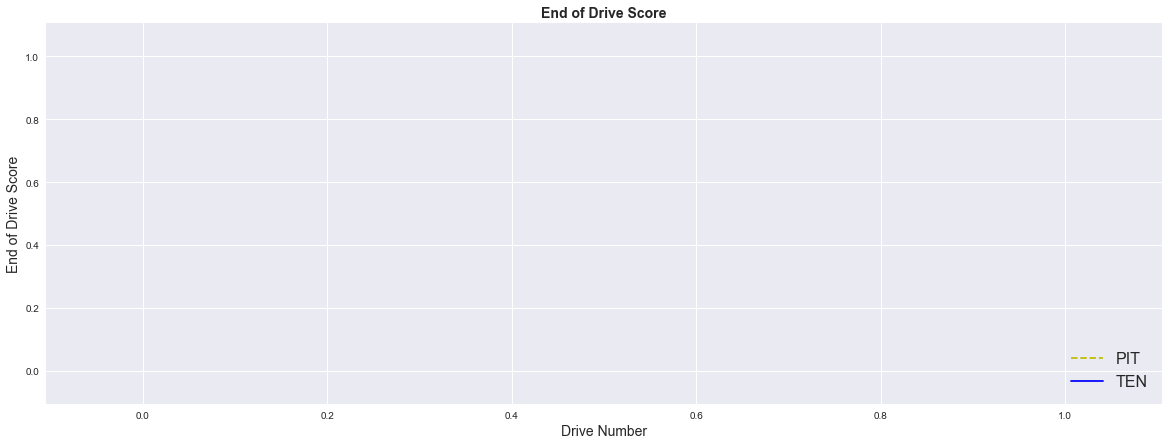

In [69]:
# Reset Fig
plt.close('all')
plt.style.use('seaborn')
fig, ax1 = plt.subplots(figsize=(20,7))
# plt.gca().invert_xaxis()

line1 = ax1.plot(ten_pit_game['drive'],ten_pit_game['total_home_score'],'y--',label='PIT')
line2 = ax1.plot(ten_pit_game['drive'],ten_pit_game['total_away_score'],'b-',label='TEN')

ax1.set_xlabel('Drive Number',fontsize=14)
ax1.set_ylabel('End of Drive Score',fontsize=14)
ax1.set_title("End of Drive Score",fontsize=14,fontweight='bold')

ax1.legend(loc=4,fontsize=16)

plt.show()

<h2>Combining weather data with dataframe data</h2>

In [70]:
import os
import re
def load_weather():

    # mapping out each stadium with their own weather dataframe in a dictionary
       
    weather_path = os.getcwd() + '\\historicalweatherdata'
    files = os.listdir(weather_path)
    df = pd.DataFrame()
    for name in files:
        if '.csv' in name and len(name) <= 7:
            
            df2 = pd.read_csv(weather_path + '\\' + name)
            df = pd.concat([df, df2], sort=True)
    
    df = df.drop(['time_local'], axis=1)
    df['Time (GMT)'] = pd.to_datetime(df['Time (GMT)'])
    df['Time (EST)'] = pd.to_datetime(df['Time (EST)'])
    
    df = df.sort_values(by=['Team Abbreviation', 'Time (EST)'])
    
    return df

In [71]:
weather_df = load_weather()

In [72]:
weather_df.head(10)

,Air Pressure (hPa),City,Dewpoint (°C),Field,Humidity (%),Precipitation (mm),Roof,Team Abbreviation,Temperature (°C),Time (EST),Time (GMT),Wind Direction (deg),Wind Speed (km/h)
0,1014.1,Glendale,0.6,Bermuda grass,67.0,NaN,Retractable,ARI,6.3,2014-12-31 21:00:00,2015-01-01 01:00:00,220.0,16.6
1,1014.8,Glendale,-0.2,Bermuda grass,65.0,NaN,Retractable,ARI,5.9,2014-12-31 22:00:00,2015-01-01 02:00:00,230.0,13.0
2,1014.8,Glendale,-1.0,Bermuda grass,63.0,NaN,Retractable,ARI,5.5,2014-12-31 23:00:00,2015-01-01 03:00:00,240.0,13.0
3,1015.1,Glendale,-1.7,Bermuda grass,59.0,NaN,Retractable,ARI,5.7,2015-01-01 00:00:00,2015-01-01 04:00:00,260.0,9.4
4,1015.5,Glendale,-1.5,Bermuda grass,67.0,NaN,Retractable,ARI,4.1,2015-01-01 01:00:00,2015-01-01 05:00:00,210.0,20.5
5,1015.6,Glendale,-1.8,Bermuda grass,70.0,NaN,Retractable,ARI,3.1,2015-01-01 02:00:00,2015-01-01 06:00:00,190.0,20.5
6,1016.4,Glendale,-1.5,Bermuda grass,78.0,NaN,Retractable,ARI,1.9,2015-01-01 03:00:00,2015-01-01 07:00:00,200.0,16.6
7,1016.7,Glendale,-1.1,Bermuda grass,86.0,NaN,Retractable,ARI,1.0,2015-01-01 04:00:00,2015-01-01 08:00:00,210.0,11.2
8,1017.1,Glendale,-1.5,Bermuda grass,84.0,NaN,Retractable,ARI,0.9,2015-01-01 05:00:00,2015-01-01 09:00:00,190.0,13.0
9,1017.7,Glendale,-2.4,Bermuda grass,78.0,NaN,Retractable,ARI,1.0,2015-01-01 06:00:00,2015-01-01 10:00:00,200.0,7.6


In [73]:
weather_df.dtypes

Air Pressure (hPa)             float64
City                            object
Dewpoint (°C)                  float64
Field                           object
Humidity (%)                   float64
Precipitation (mm)             float64
Roof                            object
Team Abbreviation               object
Temperature (°C)               float64
Time (EST)              datetime64[ns]
Time (GMT)              datetime64[ns]
Wind Direction (deg)           float64
Wind Speed (km/h)              float64
dtype: object

In [74]:
nfl_small2.head()

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass,Start_Time,diff,Estimated_Time
0,362094,44,2017090700,2017-09-07,15:00,900.0,1800.0,3600.0,Half1,0,1,NE,KC,NE,home,KC,KC,35.0,1,0,NaN,0.0,KC 35,0,73,C.Santos kicks 64 yards from KC 35 to NE 1. D....,kickoff,0.0,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-09-07 20:30:00,00:00:00,2017-09-07 20:30:00
1,362095,68,2017090700,2017-09-07,14:55,895.0,1795.0,3595.0,Half1,0,1,NE,KC,NE,home,KC,NE,73.0,1,0,1.0,0.0,NE 27,10,0,(14:55) NE 12-Brady 18th season as Patriots QB...,pass,0.0,deep,27.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-09-07 20:30:00,00:00:15,2017-09-07 20:30:15
2,362096,94,2017090700,2017-09-07,14:49,889.0,1789.0,3589.0,Half1,0,1,NE,KC,NE,home,KC,NE,73.0,1,0,2.0,0.0,NE 27,10,8,(14:49) T.Brady pass short right to R.Burkhead...,pass,8.0,short,1.0,7.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2017-09-07 20:30:00,00:00:33,2017-09-07 20:30:33
3,362097,118,2017090700,2017-09-07,14:14,854.0,1754.0,3554.0,Half1,0,1,NE,KC,NE,home,KC,NE,65.0,1,0,3.0,0.0,NE 35,2,73,(14:14) (Shotgun) J.White left guard to NE 43 ...,run,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-09-07 20:30:00,00:02:18,2017-09-07 20:32:18
4,362098,139,2017090700,2017-09-07,13:52,832.0,1732.0,3532.0,Half1,0,1,NE,KC,NE,home,KC,NE,57.0,1,0,1.0,0.0,NE 43,10,19,"(13:52) (No Huddle, Shotgun) J.White up the mi...",run,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-09-07 20:30:00,00:03:24,2017-09-07 20:33:24


In [88]:
nfl_small2['Estimated_Hour'] = nfl_small2['Estimated_Time'].dt.round('H')
nfl_weather = pd.merge(nfl_small2, weather_df, how = 'left', left_on = ['home_team', 'Estimated_Hour'], right_on = ['Team Abbreviation', 'Time (EST)'])
nfl_weather.sample(10)

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass,Start_Time,diff,Estimated_Time,Estimated_Hour,Air Pressure (hPa),City,Dewpoint (°C),Field,Humidity (%),Precipitation (mm),Roof,Team Abbreviation,Temperature (°C),Time (EST),Time (GMT),Wind Direction (deg),Wind Speed (km/h)
35215,396793,836,2017121006,2017-12-10,00:07,7.0,907.0,2707.0,Half1,0,1,KC,OAK,KC,home,OAK,OAK,17.0,4,0,1.0,0.0,OAK 17,10,85,(:07) (Shotgun) A.Smith pass short middle to T...,pass,16.0,short,-2.0,18.0,NaN,NaN,NaN,NaN,NaN,3,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2017-12-10 13:00:00,00:44:39,2017-12-10 13:44:39,2017-12-10 14:00:00,1020.1,Kansas City,-3.8,Bermuda grass,35.0,0.0,Open,KC,11.1,2017-12-10 14:00:00,2017-12-10 18:00:00,300.0,18.4
71784,432575,3070,2018111106,2018-11-11,13:21:00,801.0,801.0,801.0,Half2,0,4,NYJ,BUF,BUF,away,NYJ,BUF,51.0,18,0,3.0,0.0,BUF 49,1,1,(13:21) M.Barkley sacked at BUF 41 for -8 yard...,pass,-8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,38,38.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-11-11 16:25:00,02:19:57,2018-11-11 18:44:57,2018-11-11 19:00:00,1027.3,East Rutherford,-5.6,UBU Sports Speed Series S5-M Synthetic Turf,41.0,0.0,Open,NYJ,6.7,2018-11-11 19:00:00,2018-11-11 23:00:00,270.0,7.6
61691,423790,1256,2018101412,2018-10-14,09:15:00,555.0,555.0,2355.0,Half1,0,2,NE,KC,KC,away,NE,NE,25.0,8,0,1.0,0.0,NE 25,10,69,(9:15) (Shotgun) S.Ware up the middle to NE 24...,run,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,6,6.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-10-14 16:25:00,01:02:15,2018-10-14 17:27:15,2018-10-14 17:00:00,1017.0,Foxborough,5.0,FieldTurf CORE,66.0,NaN,Open,NE,11.1,2018-10-14 17:00:00,2018-10-14 21:00:00,NaN,0.0
44969,405818,1979,2017123114,2017-12-31,00:32,32.0,32.0,1832.0,Half1,0,2,LA,SF,LA,home,SF,SF,25.0,12,0,1.0,0.0,SF 25,10,44,(:32) (Shotgun) S.Mannion pass incomplete deep...,pass,0.0,deep,16.0,NaN,NaN,NaN,NaN,NaN,NaN,3,20,3.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-12-31 16:25:00,01:28:24,2017-12-31 17:53:24,2017-12-31 18:00:00,1018.1,Los Angeles,11.6,Grass,72.0,0.0,Open,LA,16.7,2017-12-31 18:00:00,2017-12-31 22:00:00,260.0,16.6
21353,384127,838,2017110500,2017-11-05,02:42,162.0,1062.0,2862.0,Half1,0,1,CAR,ATL,CAR,home,ATL,CAR,74.0,6,0,3.0,0.0,CAR 26,9,11,(2:42) (Shotgun) C.Newton pass short left to D...,pass,10.0,short,9.0,1.0,NaN,NaN,NaN,NaN,NaN,0,10,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2017-11-05 13:00:00,00:36:54,2017-11-05 13:36:54,2017-11-05 14:00:00,1021.2,Charlotte,14.5,Bermuda grass,84.0,0.0,Open,CAR,17.2,2017-11-05 14:00:00,2017-11-05 18:00:00,150.0,5.4
53088,415187,1774,2018092310,2018-09-23,04:00:00,240.0,240.0,2040.0,Half1,0,2,LA,LAC,LAC,away,LA,LA,15.0,9,0,3.0,0.0,LA 15,1,75,(4:00) M.Gordon right tackle to LA 11 for 4 ya...,run,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,6,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-09-23 16:25:00,01:18:00,2018-09-23 17:43:00,2018-09-23 18:00:00,1010.8,Los Angeles,15.5,Grass,68.0,0.0,Open,LA,21.7,2018-09-23 18:00:00,2018-09-23 22:00:00,250.0,22.3
22783,384881,1781,2017110508,2017-11-05,03:36,216.0,216.0,2016.0,Half1,0,2,SEA,WAS,WAS,away,SEA,SEA,1.0,11,0,1.0,1.0,SEA 1,1,70,(3:36) T.Bergstrom and R.Anderson reported in ...,run,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-11-05 16:05:00,01:19:12,2017-11-05 17:24:12,2017-11-05 17:00:00,1012.4,Seattle,-0.1,FieldTurf Revolution 360,92.0,1.3,Open,SEA,1.1,2017-11-05 17:00:00,2017-11-0

In [80]:
nfl_weather.dtypes

index                                  int64
play_id                                int64
game_id                                int64
game_date                     datetime64[ns]
time                                  object
quarter_seconds_remaining            float64
half_seconds_remaining               float64
game_seconds_remaining               float64
game_half                             object
quarter_end                            int64
qtr                                    int64
home_team                             object
away_team                             object
posteam                               object
posteam_type                          object
defteam                               object
side_of_field                         object
yardline_100                         float64
drive                                  int64
sp                                     int64
down                                 float64
goal_to_go                           float64
yrdln     

In [77]:
nfl_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87272 entries, 0 to 87271
Data columns (total 67 columns):
index                        87272 non-null int64
play_id                      87272 non-null int64
game_id                      87272 non-null int64
game_date                    87272 non-null datetime64[ns]
time                         87272 non-null object
quarter_seconds_remaining    87272 non-null float64
half_seconds_remaining       87272 non-null float64
game_seconds_remaining       87272 non-null float64
game_half                    87272 non-null object
quarter_end                  87272 non-null int64
qtr                          87272 non-null int64
home_team                    87272 non-null object
away_team                    87272 non-null object
posteam                      87272 non-null object
posteam_type                 87272 non-null object
defteam                      87272 non-null object
side_of_field                87127 non-null object
yardline_100      

In [87]:
nfl_small2.info(), weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87272 entries, 0 to 87271
Data columns (total 54 columns):
index                        87272 non-null int64
play_id                      87272 non-null int64
game_id                      87272 non-null int64
game_date                    87272 non-null datetime64[ns]
time                         87272 non-null object
quarter_seconds_remaining    87272 non-null float64
half_seconds_remaining       87272 non-null float64
game_seconds_remaining       87272 non-null float64
game_half                    87272 non-null object
quarter_end                  87272 non-null int64
qtr                          87272 non-null int64
home_team                    87272 non-null object
away_team                    87272 non-null object
posteam                      87272 non-null object
posteam_type                 87272 non-null object
defteam                      87272 non-null object
side_of_field                87127 non-null object
yardline_100      

(None, None)

In [91]:
with open ('stadium_dict.pkl', 'rb') as handle:
    stadium_dict = pickle.load(handle)

for k, v in stadium_dict.items():
    print(k,v)

ARI ['Bermuda grass', 'Retractable']
ATL ['FieldTurf Revolution 360', 'Retractable']
BAL ['Bermuda grass', 'Open']
BUF ['A-Turf Titan 50', 'Open']
CAR ['Bermuda grass', 'Open']
CHI ['Kentucky bluegrass', 'Open']
CIN ['UBU Speed Series S5-M Synthetic Turf', 'Open']
CLE ['Kentucky bluegrass', 'Open']
DAL ['Hellas Matrix Turf', 'Retractable']
DEN ['Kentucky bluegrass', 'Open']
DET ['FieldTurf Classic HD', 'Fixed']
GB ['Desso GrassMaster', 'Open']
HOU ['Hellas Matrix Turf', 'Retractable']
IND ['Shaw Sports Momentum Pro', 'Retractable']
JAX ['Bermuda grass', 'Open']
KC ['Bermuda grass', 'Open']
LAC ['Grass', 'Open']
LA ['Grass', 'Open']
MIA ['Platinum TE Paspalum', 'Open']
MIN ['UBU Speed Series S5-M Synthetic Turf', 'Fixed']
NE ['FieldTurf CORE', 'Open']
NO ['FieldTurf Revolution 360', 'Fixed']
NYG ['UBU Sports Speed Series S5-M Synthetic Turf', 'Open']
NYJ ['UBU Sports Speed Series S5-M Synthetic Turf', 'Open']
OAK ['Grass', 'Open']
PHI ['Desso GrassMaster', 'Open']
PIT ['Kentucky bluegra

In [93]:
print(nfl_weather['Roof'].info())
nfl_weather['Roof'] = nfl_weather.apply(lambda x: stadium_dict[x['Hmoe']])


SyntaxError: invalid syntax (<ipython-input-93-84e808481fc5>, line 1)

In [94]:
nfl_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87272 entries, 0 to 87271
Data columns (total 67 columns):
index                        87272 non-null int64
play_id                      87272 non-null int64
game_id                      87272 non-null int64
game_date                    87272 non-null datetime64[ns]
time                         87272 non-null object
quarter_seconds_remaining    87272 non-null float64
half_seconds_remaining       87272 non-null float64
game_seconds_remaining       87272 non-null float64
game_half                    87272 non-null object
quarter_end                  87272 non-null int64
qtr                          87272 non-null int64
home_team                    87272 non-null object
away_team                    87272 non-null object
posteam                      87272 non-null object
posteam_type                 87272 non-null object
defteam                      87272 non-null object
side_of_field                87127 non-null object
yardline_100      

In [100]:
nfl_weather[nfl_weather[['Roof', 'Team Abbreviation']].isnull().any(axis=1)].sample(200)

,index,play_id,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass,Start_Time,diff,Estimated_Time,Estimated_Hour,Air Pressure (hPa),City,Dewpoint (°C),Field,Humidity (%),Precipitation (mm),Roof,Team Abbreviation,Temperature (°C),Time (EST),Time (GMT),Wind Direction (deg),Wind Speed (km/h)
20858,382956,2161,2017102910,2017-10-29,14:22,862.0,1762.0,1762.0,Half2,0,3,DET,PIT,DET,home,PIT,DET,76.0,14,0,2.0,0.0,DET 24,11,4,"(14:22) (No Huddle, Shotgun) A.Abdullah up the...",run,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,10,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-10-29 20:30:00,01:31:54,2017-10-29 22:01:54,2017-10-29 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
24026,385953,1963,2017111202,2017-11-12,00:19,19.0,19.0,1819.0,Half1,0,2,DET,CLE,CLE,away,DET,DET,20.0,11,0,NaN,0.0,DET 20,0,73,Timeout #3 by DET at 00:19.,no_play,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,10,10.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-11-12 13:00:00,01:29:03,2017-11-12 14:29:03,2017-11-12 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
24074,386001,3006,2017111202,2017-11-12,13:33,813.0,813.0,813.0,Half2,0,4,DET,CLE,DET,home,CLE,CLE,48.0,17,0,1.0,0.0,CLE 48,10,61,"(13:33) (No Huddle, Shotgun) M.Stafford sacked...",pass,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,24,23.0,24.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-11-12 13:00:00,02:19:21,2017-11-12 15:19:21,2017-11-12 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
31713,394708,460,2017120302,2017-12-03,05:58,358.0,1258.0,3058.0,Half1,0,1,BUF,NE,NE,away,BUF,NE,76.0,2,0,2.0,0.0,NE 24,8,21,(5:58) (Shotgun) T.Brady pass short left to R....,pass,6.0,short,-4.0,10.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2017-12-03 13:00:00,00:27:06,2017-12-03 13:27:06,2017-12-03 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
37409,400053,2553,2017121700,2017-12-17,10:05,605.0,1505.0,1505.0,Half2,0,3,BUF,MIA,MIA,away,BUF,BUF,42.0,13,0,2.0,0.0,BUF 42,1,24,(10:05) (Shotgun) J.Cutler FUMBLES (Aborted) a...,run,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,6,6.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2017-12-17 13:00:00,01:44:45,2017-12-17 14:44:45,2017-12-17 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
11727,373645,1351,2017100802,2017-10-08,09:06,546.0,546.0,2346.0,Half1,0,2,DET,CAR,CAR,away,DET,CAR,74.0,8,0,1.0,0.0,CAR 26,10,2,(9:06) (Shotgun) C.Newton pass short left to K...,pass,2.0,short,2.0,0.0,NaN,NaN,NaN,NaN,NaN,10,10,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2017-10-08 13:00:00,01:02:42,2017-10-08 14:02:42,2017-10-08 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
28493,390592,2673,2017112300,2017-11-23,08:04,484.0,1384.0,1384.0,Half2,0,3,DET,MIN,DET,home,MIN,MIN,14.0,14,0,2.0,0.0,MIN 14,10,61,(8:04) (Shotgun) M.Stafford pass short right t...,pass,0.0,short,0.0,0.0,NaN,NaN,NaN,NaN,NaN,10,27,10.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2017-11-23 12:30:00,01:50:48,2017-11-23 14:20:48,2017-11-23 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
20798,382896,767,2017102910,2017-10-29,01:05,65.0,965.0,2765.0,Half1,0,1,DET,PIT,DET,home,PIT,DET,75.0,6,0,1.0,0.0,DET 25,10,15,(1:05) M.Stafford pass incomplete deep left to...,pass,0.0,deep,16.0,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-10-29 20:30:00,00:41:45,2017-10-29 21:11:45,2017-10-29 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
53220,4